In [1]:
##loading the provided datasets

In [2]:
import pandas as pd

In [3]:
df_2014 = pd.read_csv('2014.csv')

In [4]:
df_2014.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2014-01-01,AA,2377,ICT,DFW,1135,1144.0,9.0,12.0,1156.0,...,85.0,78.0,57.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,AA,2378,MIA,TPA,2225,2220.0,-5.0,14.0,2234.0,...,60.0,55.0,37.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,EV,2500,DFW,HOU,2105,NaN,NaN,NaN,NaN,...,60.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2502,CRW,DFW,1655,1805.0,70.0,6.0,1811.0,...,185.0,180.0,150.0,946.0,0.0,0.0,0.0,0.0,65.0,NaN
4,2014-01-01,EV,2502,DFW,CRW,1320,1440.0,80.0,9.0,1449.0,...,125.0,115.0,101.0,946.0,6.0,0.0,0.0,0.0,64.0,NaN


In [5]:
df_2014.describe

<bound method NDFrame.describe of             FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0        2014-01-01         AA               2377    ICT  DFW          1135   
1        2014-01-01         AA               2378    MIA  TPA          2225   
2        2014-01-01         EV               2500    DFW  HOU          2105   
3        2014-01-01         EV               2502    CRW  DFW          1655   
4        2014-01-01         EV               2502    DFW  CRW          1320   
...             ...        ...                ...    ...  ...           ...   
5819806  2014-12-31         MQ               3552    RDU  LGA           640   
5819807  2014-12-31         MQ               3555    CMH  ORD           720   
5819808  2014-12-31         MQ               3564    GSO  LGA          1010   
5819809  2014-12-31         MQ               3611    CAE  DFW           600   
5819810  2014-12-31         MQ               3612    CLL  DFW          1120   

         DEP_TIME

In [6]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')

In [7]:
dataframes = {'2014' : df_2014,
              '2015' : df_2015,
              '2016' : df_2016,
              '2017' : df_2017,
              '2018' : df_2018}

In [8]:
for df in dataframes:
    print(df, ": ", dataframes[df].shape)

2014 :  (5819811, 28)
2015 :  (5819079, 28)
2016 :  (5617658, 28)
2017 :  (5674621, 28)
2018 :  (7213446, 28)


In [9]:
## combined departure delay times from dataframes 2014-2018
df_comb_dep_delay = pd.concat([df['DEP_DELAY'] for df in dataframes.values()])

In [10]:
df_comb_dep_delay.shape

(30144615,)

In [11]:
df_comb_dep_delay.describe()

count    2.967469e+07
mean     9.743912e+00
std      4.084770e+01
min     -2.510000e+02
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      2.755000e+03
Name: DEP_DELAY, dtype: float64

In [12]:
import statistics

In [13]:
print(df_comb_dep_delay.mean())

9.743912210430391


In [14]:
print(df_comb_dep_delay.median())

-2.0


The difference between the mean value and the median indicates in departure delay that there are more flights that have a negative delay rather than positive (which means that they depart early), but when a delay occurs it tends to be supstantial (greatly above 9 minutes).

In [15]:
## combined arrival delay times from dataframes 2014-2018
df_comb_arr_delay = pd.concat([df['ARR_DELAY'] for df in dataframes.values()])
print(df_comb_arr_delay.mean())
print(df_comb_arr_delay.median())

4.939717464950979
-5.0


In [16]:
del df_comb_arr_delay
del df_comb_dep_delay

When it comes to arrival delays time, a similar effect can be noticed. There are more delays that are lower in value, but there are higher positive values that widen the gap between the mean and the median.
Both of the mean and median values are lower for arrival delay than the departure delay which could indicate that the pilots tend to try to arrive earlier.

The value of the mean delay time indicates that the average flight arrives on time (it is considered on time if the arrival delay is less that 15 minutes)

In [17]:
from tabulate import tabulate

In [18]:
tabulate_data = []
tabulate_data_col_names = ["DELAY_TYPE", "MEAN", "MEDIAN"]

other_delays = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for delay_type in other_delays:
    df_comb = pd.concat([df[delay_type] for df in dataframes.values()])
    tabulate_data.append([delay_type, df_comb.mean(), df_comb.median()])
    del df_comb
    
print(tabulate(tabulate_data, headers = tabulate_data_col_names))

DELAY_TYPE                 MEAN    MEDIAN
-------------------  ----------  --------
CARRIER_DELAY        19.0782            1
WEATHER_DELAY         2.9049            0
NAS_DELAY            14.6919            2
SECURITY_DELAY        0.0794567         0
LATE_AIRCRAFT_DELAY  24.5113            4


Looking at the median values of the other types of delays, it can be said that they don't happen often, and most of them are small delays of 0-4 minutes. But judging by the mean values: CARRIER, NAS and LATE_AIRCRAFT delays can contribute a lot to the overall delay of the flights.

In [19]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [20]:
tabulate_data = []
tabulate_data_col_names = ["DELAY_TYPE", "SKEW", "KURTOSIS"]

other_delays = ['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for delay_type in other_delays:
    df_comb = pd.concat([df[delay_type] for df in dataframes.values()])
    tabulate_data.append([delay_type, skew(df_comb[0], nan_policy='omit'), kurtosis(df_comb[0], fisher = False, nan_policy='omit')])
    del df_comb
    
print(tabulate(tabulate_data, headers = tabulate_data_col_names))

DELAY_TYPE               SKEW    KURTOSIS
-------------------  --------  ----------
DEP_DELAY            1.05722      2.56056
ARR_DELAY            0.555861     2.03269
CARRIER_DELAY        0            0
WEATHER_DELAY        0            0
NAS_DELAY            0            0
SECURITY_DELAY       0            0
LATE_AIRCRAFT_DELAY  0            0


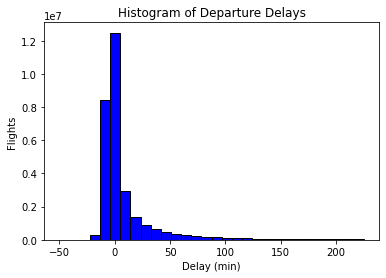

In [21]:
import matplotlib.pyplot as plt

df_comb_dep_delay = pd.concat([df['DEP_DELAY'] for df in dataframes.values()])

df_comb_dep_delay = df_comb_dep_delay.dropna()

plt.hist(df_comb_dep_delay, range=(-50, 225), color = 'blue', edgecolor = 'black', bins = int(30))

plt.title('Histogram of Departure Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

del df_comb_dep_delay

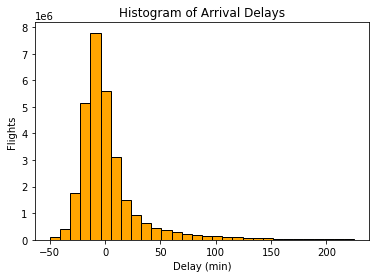

In [32]:
df_comb_arr_delay = pd.concat([df['ARR_DELAY'] for df in dataframes.values()])

df_comb_arr_delay = df_comb_arr_delay.dropna()

plt.hist(df_comb_arr_delay, range=(-50, 225), color = 'orange', edgecolor = 'black', bins = int(30))

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

del df_comb_arr_delay

The skewness of arrival delay and departure delay are both positive, which indicates that the data is skewed right. The tail of the distributions are longer to the right (in the direction of higher values). This means that there are a lot of flights close to the mean, but there are supstantially more flights that delay an extreme amount rather than come extremely early.

Kurtosis was calculated using the Pearson formula (kurtosis for normal distribution is 3). The calculated kurtosis for departure and arrival delay are less than 3 (between 2 and 3), which indicates negative curtosis. This means that the distributions are "light-tailed" and they have most of the values near the mean and fewer values in the tails

In [23]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

Text(0, 0.5, 'Flights (number)')

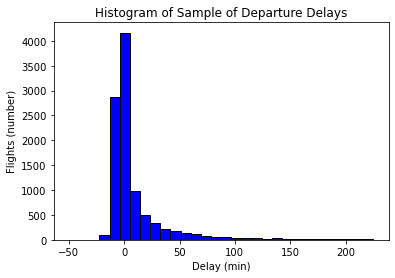

In [28]:
df_comb_dep_delay = pd.concat([df['DEP_DELAY'] for df in dataframes.values()])

df_comb_dep_delay = df_comb_dep_delay.dropna()

df_comb_dep_delay = df_comb_dep_delay[(-50 < df_comb_dep_delay) & (df_comb_dep_delay < 225)]

df_comb_dep_delay_sample = df_comb_dep_delay.sample(n=10000)

plt.hist(df_comb_dep_delay_sample, range=(-50, 225), color = 'blue', edgecolor = 'black', bins = int(30))

plt.title('Histogram of Sample of Departure Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights (number)')

In [29]:
print(get_best_distribution(df_comb_dep_delay_sample))

del df_comb_dep_delay
del df_comb_dep_delay_sample

p value for norm = 0.0
p value for exponweib = 1.2997385208617137e-300
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 1.8592031379093662e-263
Best fitting distribution: genextreme
Best p value: 1.8592031379093662e-263
Parameters for the best fit: (-0.2415170200384233, -2.5256981861642913, 9.753066037792248)
('genextreme', 1.8592031379093662e-263, (-0.2415170200384233, -2.5256981861642913, 9.753066037792248))


Text(0, 0.5, 'Flights (number)')

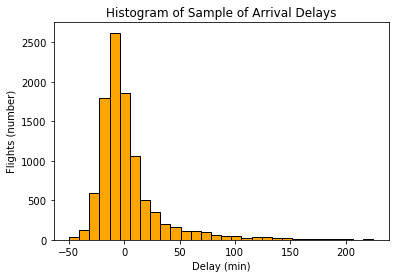

In [33]:
df_comb_arr_delay = pd.concat([df['ARR_DELAY'] for df in dataframes.values()])

df_comb_arr_delay = df_comb_arr_delay.dropna()

df_comb_arr_delay = df_comb_arr_delay[(-50 < df_comb_arr_delay) & (df_comb_arr_delay < 225)]

df_comb_arr_delay_sample = df_comb_arr_delay.sample(n=10000)

plt.hist(df_comb_arr_delay_sample, range=(-50, 225), color = 'orange', edgecolor = 'black', bins = int(30))

plt.title('Histogram of Sample of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights (number)')

In [31]:
print(get_best_distribution(df_comb_arr_delay_sample))

del df_comb_arr_delay
del df_comb_arr_delay_sample

p value for norm = 0.0
p value for exponweib = 5.255576230909859e-60
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 5.396416604188313e-45
Best fitting distribution: genextreme
Best p value: 5.396416604188313e-45
Parameters for the best fit: (-0.14507270420285956, -10.023749211189383, 16.410033631897043)
('genextreme', 5.396416604188313e-45, (-0.14507270420285956, -10.023749211189383, 16.410033631897043))


To determine which theoretical distribution would fit the delay a goodness of fit test was used for different distributions. The test returns the probability that our data corresponds to the given distribution type.
The highest probability distribution turned out to be the Genextreme Distribution for both the departure delay and arrival delay data.
Using the example image for the Genextreme Distribution we can see that it looks coherent to the histograms of departure and arrival delays


![Genex-Dist-example](scipy-stats-genextreme-1.png)

(image source: docs.scipy.org)